
# Projeto 1 - Redes Sociais

## Criação de Modelos

## Alunos

<table>
  <tr>
    <td align="center"><a href="https://github.com/DaviReisVieira"><img style="border-radius: 50%;" src="https://github.com/DaviReisVieira.png" width="100px;" alt=""/><br /><sub><b>Davi Reis Vieira</b></sub></a><br /><a href="https://github.com/DaviReisVieira" title="Davi Reis Vieira">O Cara -1</a></td>
    <td align="center"><a href="https://github.com/guishas"><img style="border-radius: 50%;" src="https://github.com/guishas.png" width="100px;" alt=""/><br /><sub><b>Guilherme Lunetta</b></sub></a><br /><a href="https://github.com/guishas" title="Guilherme Lunetta">O cara 0</a></td>
    <td align="center"><a href="https://github.com/josermf2"><img style="border-radius: 50%;" src="https://github.com/josermf2.png" width="100px;" alt=""/><br /><sub><b>José Fernandes</b></sub></a><br /><a href="https://github.com/josermf2" title="José Fernandes">O cara +1</a></td>
  </tr>
</table>

## Importando o dataset

- Importando bibliotecas

In [71]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('reviews_july.csv')
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,True,0,0,...,True,False,False,76561198074616040,148,12,29259.0,0.0,18588.0,1.597875e+09
1,292030,The Witcher 3: Wild Hunt,73576952,brazilian,Não tenho palavras para dizer como esse jogo e...,2020-07-31 20:46:46,2020-07-31 20:48:04,True,1,0,...,True,False,False,76561198120075031,38,9,4389.0,0.0,4389.0,1.557089e+09
2,292030,The Witcher 3: Wild Hunt,73575959,brazilian,Epic,2020-07-31 20:17:38,2020-07-31 20:17:38,True,0,0,...,True,False,False,76561198101494872,25,1,6653.0,0.0,4136.0,1.608502e+09
3,292030,The Witcher 3: Wild Hunt,73575666,brazilian,"Melhor jogo do fucking universo, compre isso e...",2020-07-31 20:09:24,2020-07-31 20:09:24,True,1,0,...,True,False,False,76561198032616918,80,2,24894.0,0.0,18568.0,1.608581e+09
4,292030,The Witcher 3: Wild Hunt,73574848,brazilian,Um dos melhores games já feito.,2020-07-31 19:45:16,2020-07-31 19:45:16,True,1,0,...,True,False,False,76561198276339634,37,4,7796.0,0.0,7755.0,1.596227e+09


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  bool   
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

## Tratando os dados

In [74]:
df.columns = df.columns.str.replace('.', '_')

/tmp/ipykernel_12/2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


- Convertendo a coluna `recommended` para inteiro

In [75]:
df['recommended'] = df['recommended'].astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  int64  
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

## Criando a variável de controle `Nível de Positividade por Usuário`

In [78]:
df['level_of_positivite'] = df.groupby('author_steamid')['recommended'].transform(lambda x: x.sum() / x.count())

## Carregando a rede criada previamente

In [79]:
import netpixi

from netpixi.integration.gt import *

g = gt_load('reviews_july.net.gz')

p = gt_draw.sfdp_layout(g)
gt_move(g, p)
gt_save(g, 'reviews_july_render.net.gz')
r = netpixi.render('reviews_july_render.net.gz')

## Criando métricas de rede Centro-Periferia

Para identificar centro e periferia de um grafo, podemos usar a biblioteca [cpnet](https://github.com/skojaku/core-periphery-detection) em conjunto com o módulo spectral da graph_tool.

In [80]:
import cpnet

from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


- Função para criar métrica `Centro-periferia`

In [81]:
df_copy = df.copy()

------------------

## Realizando as regressões e salvando os resultados

In [82]:
import regression as reg

In [83]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  int64  
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

In [90]:
results_a = reg.logistic(data=df_copy, formula='recommended ~ author_playtime_forever + level_of_positivite')
results_a.micro_summary()

Optimization terminated successfully.
         Current function value: 0.015784
         Iterations 11


variable,coefficient,std error,p-value
author_playtime_forever,0.000003,0.000002,0.194154
level_of_positivite,14.706233,0.271371,0.000000


0.35% of average residuals inside


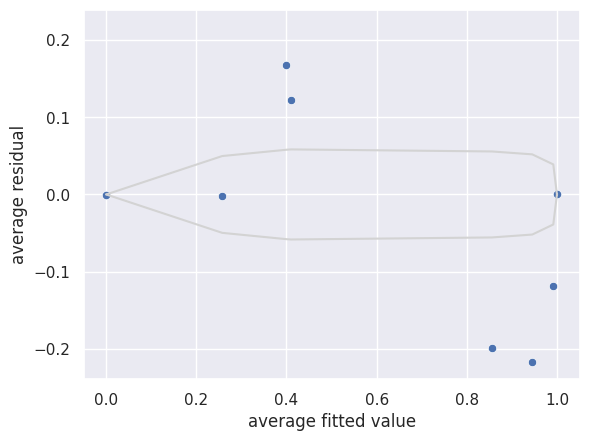

In [91]:
results_a.plot_residuals()

In [86]:
results_b = reg.logistic(data=df_copy, formula='recommended ~ received_for_free + level_of_positivite')
results_b.micro_summary()

Optimization terminated successfully.
         Current function value: 0.014880
         Iterations 11


variable,coefficient,std error,p-value
received_for_free[T.True],1.822308,0.167336,0.000000
level_of_positivite,14.917310,0.281610,0.000000


0.35% of average residuals inside


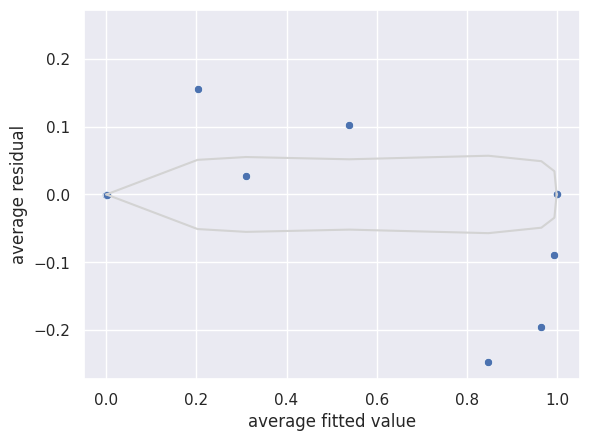

In [87]:
results_b.plot_residuals()

In [88]:
results_e = reg.logistic(data=df_copy, formula='recommended ~ author_playtime_forever + received_for_free + level_of_positivite')
results_e.micro_summary()

Optimization terminated successfully.
         Current function value: 0.014871
         Iterations 11


variable,coefficient,std error,p-value
received_for_free[T.True],1.817361,0.167397,0.000000
author_playtime_forever,0.000002,0.000002,0.305249
level_of_positivite,14.909891,0.281710,0.000000


0.35% of average residuals inside


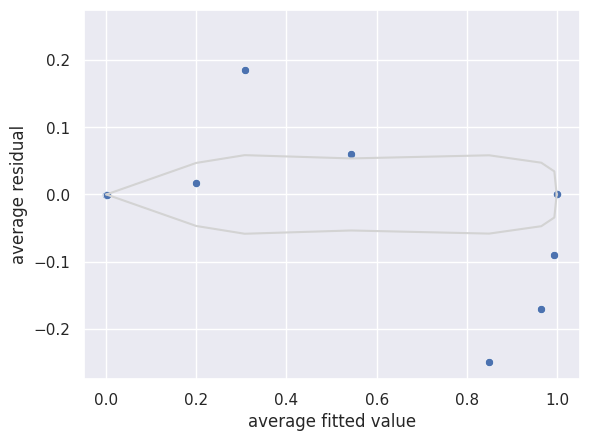

In [89]:
results_e.plot_residuals()